# Chapter 6 - Exercises

2) Load the wind data from ch4 and create a new model with appropriate number of inputs and outputs.

In [116]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from pathlib import Path

In [117]:
# try to build a regression model for now

In [118]:
wine_data = Path('/home/kamil/_LEARNING/dlwpt-code/data/p1ch4/tabular-wine/winequality-white.csv')
df = pd.read_csv(wine_data, sep=';')

In [119]:
# fix columns
df.columns = [col.lower().replace(' ','_') for col in df.columns]
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [120]:
df_backup = df.copy(deep=True)

In [121]:
# normalize data

In [122]:
for col in df.columns:
    df.loc[:,col] = df[col]/df[col].max()
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,0.492958,0.245455,0.216867,0.314590,0.130058,0.155709,0.386364,0.963445,0.785340,0.416667,0.619718,0.666667
1,0.443662,0.272727,0.204819,0.024316,0.141618,0.048443,0.300000,0.956708,0.863874,0.453704,0.669014,0.666667
2,0.570423,0.254545,0.240964,0.104863,0.144509,0.103806,0.220455,0.957766,0.853403,0.407407,0.711268,0.666667
3,0.507042,0.209091,0.192771,0.129179,0.167630,0.162630,0.422727,0.958248,0.835079,0.370370,0.697183,0.666667
4,0.507042,0.209091,0.192771,0.129179,0.167630,0.162630,0.422727,0.958248,0.835079,0.370370,0.697183,0.666667


In [123]:
df_train = df.sample(frac=0.8).sample(frac=1)
valid_index = [ind for ind in df.index if ind not in df_train.index]
df_valid = df.loc[valid_index,:]
df_train.shape, df_valid.shape, df.shape

((3918, 12), (980, 12), (4898, 12))

In [124]:
TARGET_INDEX = -1
y_train = df_train.iloc[:,TARGET_INDEX:].copy(deep=True).reset_index(drop=True)
X_train = df_train.iloc[:,:TARGET_INDEX].copy(deep=True).reset_index(drop=True)

y_test = df_valid.iloc[:,TARGET_INDEX:].copy(deep=True).reset_index(drop=True)
X_test = df_valid.iloc[:,:TARGET_INDEX].copy(deep=True).reset_index(drop=True)

In [127]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3918 entries, 0 to 3917
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         3918 non-null   float64
 1   volatile_acidity      3918 non-null   float64
 2   citric_acid           3918 non-null   float64
 3   residual_sugar        3918 non-null   float64
 4   chlorides             3918 non-null   float64
 5   free_sulfur_dioxide   3918 non-null   float64
 6   total_sulfur_dioxide  3918 non-null   float64
 7   density               3918 non-null   float64
 8   ph                    3918 non-null   float64
 9   sulphates             3918 non-null   float64
 10  alcohol               3918 non-null   float64
dtypes: float64(11)
memory usage: 336.8 KB


In [128]:
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)

X_test = X_test.astype(np.float32)
y_test = y_test.astype(np.float32)

In [129]:
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()

X_test_np = X_test.to_numpy()
y_test_np = y_test.to_numpy()

In [130]:
X_train_t = torch.from_numpy(X_train_np)
X_train_t.type()

'torch.FloatTensor'

In [131]:
X_test_t = torch.from_numpy(X_test_np)
X_test_t.type()

'torch.FloatTensor'

In [132]:
y_train_t = torch.from_numpy(y_train_np)
y_train_t.type()

'torch.FloatTensor'

In [133]:
y_test_t = torch.from_numpy(y_test_np)
y_test_t.type()

'torch.FloatTensor'

In [134]:
X_train_t.shape

torch.Size([3918, 11])

In [135]:
y_train_t.shape

torch.Size([3918, 1])

In [155]:
model = nn.Sequential(
    nn.Linear(11,22),
    nn.ReLU(),
    nn.Linear(22,44),
    nn.ReLU(),
    nn.Linear(44,22),
    nn.ReLU(),
    nn.Linear(22,11),
    nn.ReLU(),
    nn.Linear(11,1)
)

In [156]:
def training_loop(n_epochs, optimizer, model, loss_fn, X_train, X_test, y_train, y_test):
    """
    """
    for epoch in range(1,n_epochs+1):
        # get predictions and loss on training
        pred = model(X_train)
        loss_train = loss_fn(pred, X_train)
        
        # validation
        pred_val = model(X_test)
        loss_val = loss_fn(pred_val, X_test)
        
        # make updates
        optimizer.zero_grad() # reset
        loss_train.backward() # calculate grad
        optimizer.step() # apply changes to parameters
        
        if epoch < 11 or epoch % 250 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")
    return

In [157]:
optimizer = optim.SGD(model.parameters(), lr=1e-4)

In [158]:
training_loop(
n_epochs=3000,
optimizer=optimizer,
model=model,
loss_fn=nn.MSELoss(),
X_train=X_train_t,
X_test=X_test_t,
y_train=y_train_t,
y_test=y_test_t)

Epoch 1, Training loss 0.1323, Validation loss 0.1328
Epoch 2, Training loss 0.1323, Validation loss 0.1327
Epoch 3, Training loss 0.1323, Validation loss 0.1327
Epoch 4, Training loss 0.1322, Validation loss 0.1327
Epoch 5, Training loss 0.1322, Validation loss 0.1327
Epoch 6, Training loss 0.1322, Validation loss 0.1327
Epoch 7, Training loss 0.1322, Validation loss 0.1326
Epoch 8, Training loss 0.1322, Validation loss 0.1326
Epoch 9, Training loss 0.1321, Validation loss 0.1326
Epoch 10, Training loss 0.1321, Validation loss 0.1326
Epoch 250, Training loss 0.1272, Validation loss 0.1276
Epoch 500, Training loss 0.1227, Validation loss 0.1230
Epoch 750, Training loss 0.1186, Validation loss 0.1190
Epoch 1000, Training loss 0.1151, Validation loss 0.1154
Epoch 1250, Training loss 0.1120, Validation loss 0.1123
Epoch 1500, Training loss 0.1093, Validation loss 0.1095
Epoch 1750, Training loss 0.1069, Validation loss 0.1071
Epoch 2000, Training loss 0.1048, Validation loss 0.1050
Epoch 

a) how long does it take to train compared to the temperature data set?

In [145]:
# it takes longer

b) can you explain what factors contribute to the training times?

In [146]:
# the dimensionality of the space is much higher, so we have more free paramaters that need optimization

c) can you get the loss to decrease while training on this dataset?

In [ ]:
# yes, I needed to add capacity to the model inorder for error to go down in both training and validation

d) how would you go about graphing this dataset?

In [159]:
# i would look at something like x=truth, y=pred and see how broad the spread is , like a heatmap almost

In [163]:
truth = y_test_t.detach().numpy()
pred = model(X_test_t).detach().numpy()

In [164]:
import matplotlib.pyplot as plt

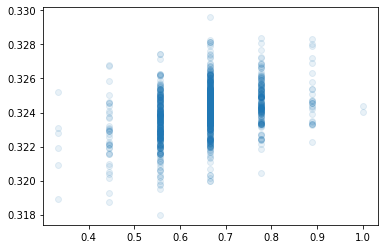

In [165]:
plt.scatter(x=truth, y=pred, alpha=0.1)